In [1]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import matplotlib as plt
import os
import json
import fiona

import statsmodels.api as sm
import statsmodels.formula.api as smf

if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
os.getenv('PUIDATA')
os.getenv('PUI2016')

'/home/cusp/amy324/PUI2016'

In [3]:
s = json.load( open(os.getenv('PUI2016')+'_amy324/fbb_matplotlibrc.json') )
pl.rcParams.update(s)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [12]:
nrg = pd.read_csv(os.getenv("PUIDATA") + "/" + "Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")

In [13]:
nrg.head(3)

,Record Number,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
0,12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,...,NaN,NaN,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
1,14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,...,Yes,None,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
2,12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,...,NaN,NaN,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN


In [14]:
new = nrg.copy()
new.head(3)

,Record Number,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
0,12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,...,NaN,NaN,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
1,14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,...,Yes,None,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
2,12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,...,NaN,NaN,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN


In [15]:
new.drop([u'Co-reported BBL Status', u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Weather Normalized Site EUI(kBtu/ft2)', 
       u'Source EUI(kBtu/ft2)', u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'], axis=1, inplace=True)
new.head()

,Record Number,"NYC Borough, Block, and Lot (BBL)",Site EUI(kBtu/ft2),Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2)
0,12086,1.000410e+09,NaN,Not Available,918919,NaN
1,14354,4.021460e+09,NaN,NaN,NaN,82730.0
2,12150,2.027620e+09,NaN,Not Available,64200,NaN
3,12590,1.006700e+09,NaN,NaN,NaN,440360.0
4,15591,2.048300e+09,NaN,Not Available,50000,NaN


In [16]:
nrg.head()

,Record Number,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
0,12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,...,NaN,NaN,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
1,14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,...,Yes,None,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
2,12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,...,NaN,NaN,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN
3,12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,...,No,None,NaN,NaN,NaN,NaN,NaN,440360.0,NaN,1.0
4,15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,...,NaN,None,Not Available,NaN,NaN,NaN,50000,NaN,Multifamily Housing,NaN


In [6]:
nrg.columns

Index([u'Record Number', u'NYC Borough, Block, and Lot (BBL)',
       u'Co-reported BBL Status', u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')

In [7]:
bsize = gp.read_file(os.getenv("PUIDATA") + "/" + "MNMapPLUTO.shp")

In [8]:
bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [9]:
nrg.drop([u'Record Number'], axis=1, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f89c22e50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5fa0749c50>]], dtype=object)

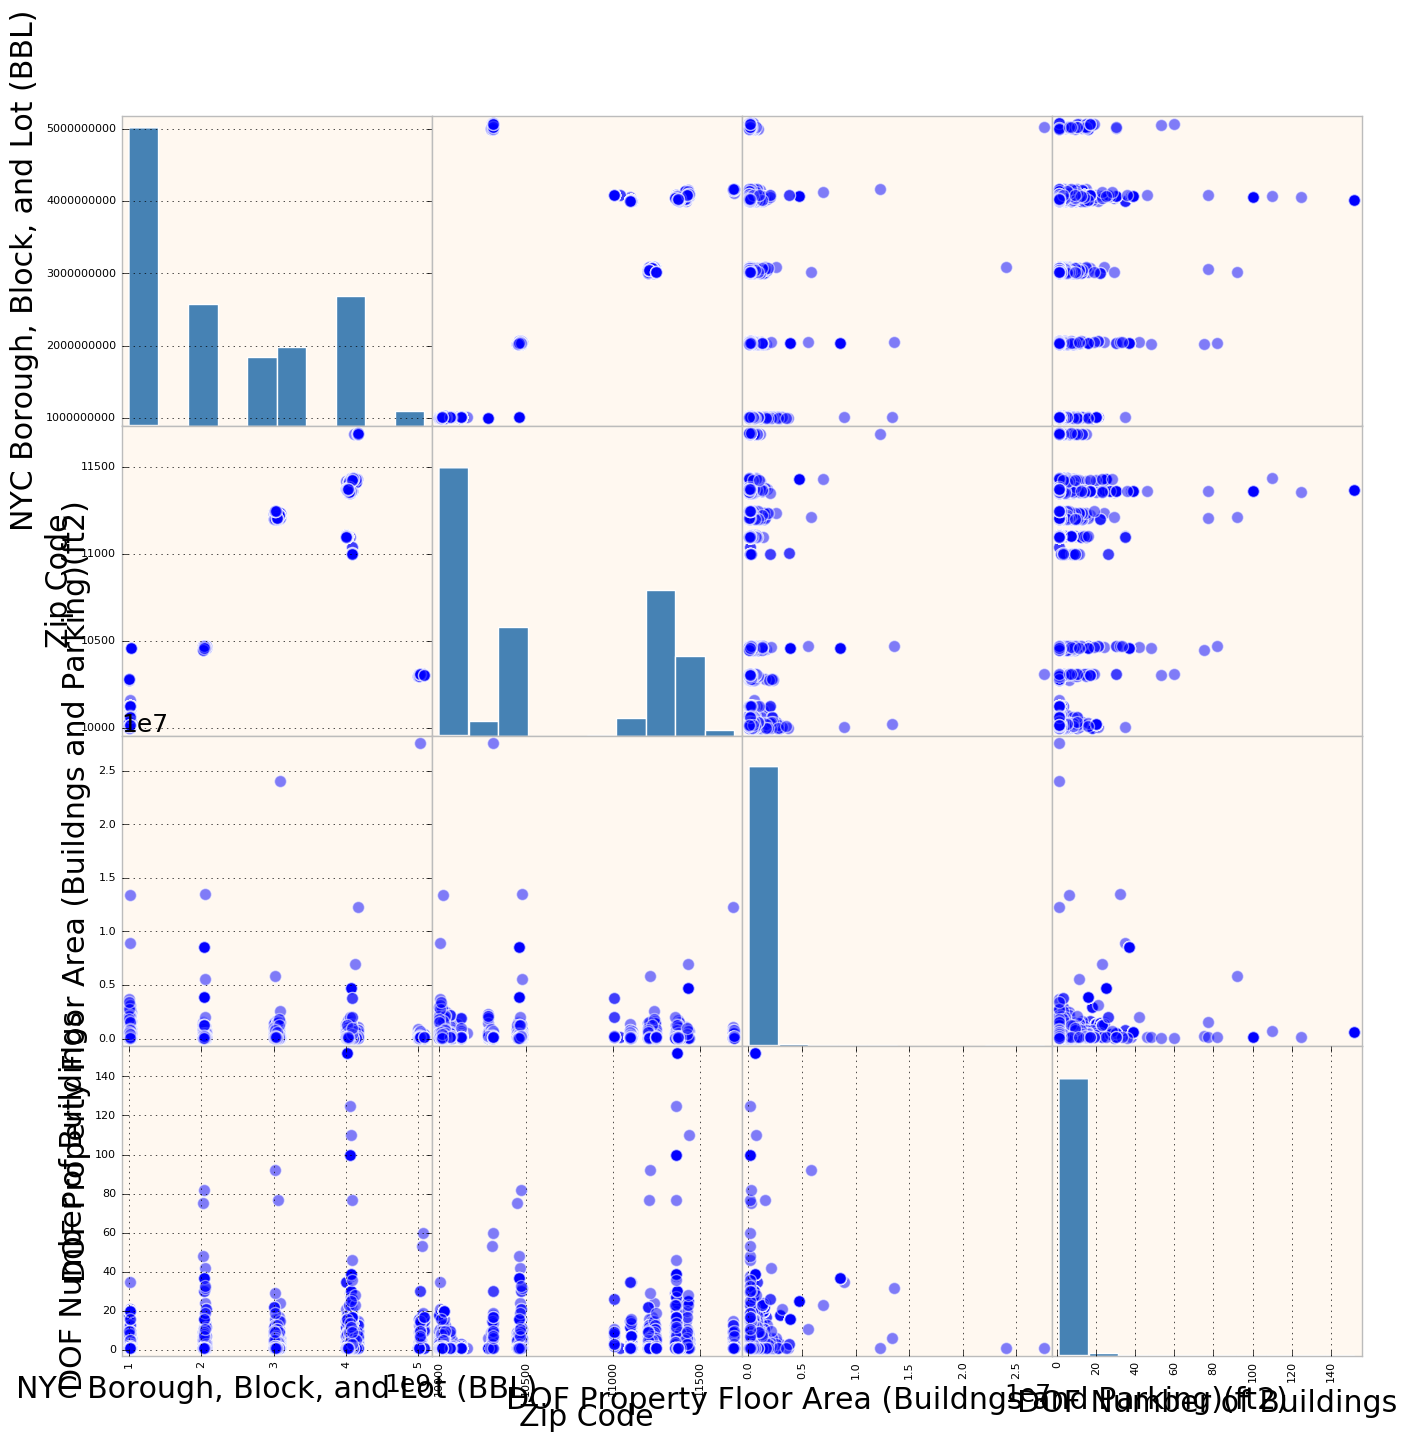

In [10]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16))

In [11]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

#### Data Wrangling: Keeping the collumns we want to our study

In [12]:
# Keeping the collumns we want in each DataFrame
nrg.drop([u'Co-reported BBL Status', u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Weather Normalized Site EUI(kBtu/ft2)', 
       u'Source EUI(kBtu/ft2)', u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'], axis=1, inplace=True)


In [13]:
bsize.drop([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AssessLand',  u'AssessTot', u'AreaSource',
              u'BldgDepth', u'BldgClass',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   
         u'OfficeArea',  u'OtherArea',   u'Overlay1', u'NumBldgs',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidFAR',
       u'RetailArea', u'SHAPE_Area', u'SHAPE_Leng',    u'SPDist1',
          u'SPDist2',    u'Sanborn',  u'SanitBoro',  u'SanitDist',
         u'SanitSub', u'SchoolDist',  u'SplitZone',  u'StrgeArea',
           u'TaxMap',  u'Tract2010',    
          u'Version',     u'XCoord',     u'YCoord', u'YearAlter1',
       u'YearAlter2',  u'YearBuilt',     u'ZMCode',    u'ZipCode',
        u'ZoneDist1',  u'ZoneDist2',  u'ZoneDist3',  u'ZoneDist4',
          u'ZoneMap',   u'geometry'], axis=1, inplace=True)

In [14]:
nrg.drop('Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',axis=1, inplace=True)

In [15]:
nrg.drop(nrg.columns[3],axis=1, inplace=True)

In [16]:
nrg.head()

,"NYC Borough, Block, and Lot (BBL)",Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²)
0,1.000410e+09,NaN,918919
1,4.021460e+09,NaN,NaN
2,2.027620e+09,NaN,64200
3,1.006700e+09,NaN,NaN
4,2.048300e+09,NaN,50000


In [17]:
bsize.drop(bsize.columns[2],axis=1, inplace=True)

In [18]:
bsize.head()

,BBL,BldgArea,UnitsRes,UnitsTotal
0,1.015450e+09,10885,16,18
1,1.007238e+09,89203,50,50
2,1.016800e+09,12000,10,10
3,1.013850e+09,203490,29,32
4,1.011970e+09,13839,26,26


### MERGE THE DATASET

TO DO IT WE NEED A COMMON COLUMN: the building id BBL However the name of this variable (column) in the Energy dataset is 'NYC Borough, Block, and Lot (BBL)'. create a column 'BBL' in the nrg dataset to pass it to the 'on' keyword argument of the merge pandas method: pd.merge(..... on=['BBL']) will use the common column 'BBL' to join the information from the 2 datasets for each BBL value (check out the complete syntax!)

In [19]:
# prepare your BBL columns
nrg.rename(columns={'NYC Borough, Block, and Lot (BBL)': 'BBL'}, inplace=True)

In [20]:
bblnrgdata = pd.merge(nrg, bsize, on='BBL')

# Now the scatter matrix plot should show more columns.
#scatter_matrix (bblnrgdata, s=30, figsize=(16, 16))

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/indexes/base.py:2097: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target._values)


In [21]:
indx_1 = (np.vectorize(canconvert)(bblnrgdata['Reported Property Floor Area (Building(s)) (ft\xc2\xb2)']))
print ("invalid entries changed to NaN %d"%sum(indx_1))
bblnrgdata['Reported Property Floor Area (Building(s)) (ft\xc2\xb2)'][~indx_1] = float('NaN')

invalid entries changed to NaN 6308


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [22]:
indx_2 = (np.vectorize(canconvert)(bblnrgdata['Site EUI(kBtu/ft2)']))
print ("invalid entries changed to NaN %d"%sum(indx_2))
bblnrgdata['Site EUI(kBtu/ft2)'][~indx_2] = float('NaN')

invalid entries changed to NaN 6346


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [23]:
indx_3 = (np.vectorize(canconvert)(bblnrgdata['BBL']))
print ("invalid entries changed to NaN %d"%sum(indx_3))
bblnrgdata['BBL'][~indx_3] = float('NaN')

invalid entries changed to NaN 6492


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [24]:
bblnrgdata.head(3)

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),BldgArea,UnitsRes,UnitsTotal
0,1.006700e+09,NaN,NaN,440360,0,1
1,1.004370e+09,NaN,NaN,52390,0,4
2,1.013110e+09,125.4,330000,313200,0,56


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f915919d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5fa3ab59d0>]], dtype=object)

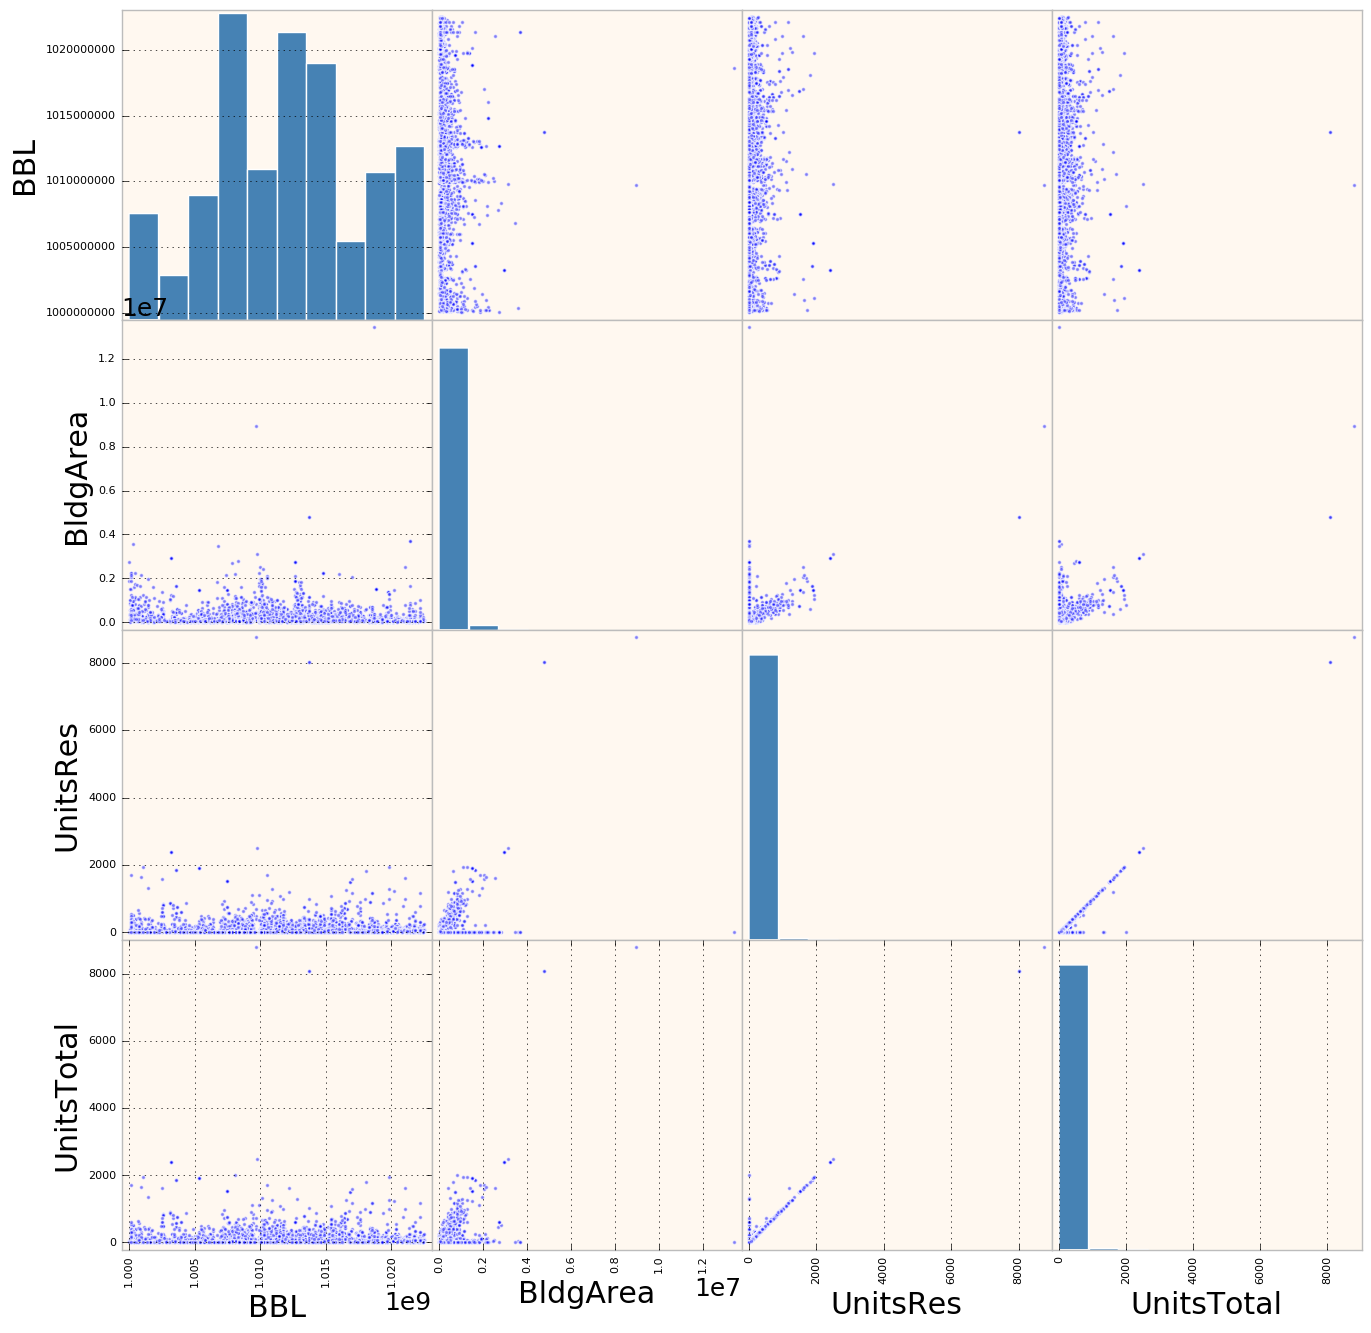

In [25]:
scatter_matrix (bblnrgdata, s=30, figsize=(16, 16))

#### Now the data is merged, let's plot Energy total x Buildings unit 

##### To make that, we have to transform all in floats and data that can't be plotted in NaN

In [26]:
# We have to create a new collumn with Total Energy information 
bblnrgdata['Energy'] = bblnrgdata['Site EUI(kBtu/ft2)'].astype(float) * \
                       bblnrgdata['Reported Property Floor Area (Building(s)) (ft\xc2\xb2)'].astype(float)

In [27]:
bblnrgdata.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),BldgArea,UnitsRes,UnitsTotal,Energy
0,1.006700e+09,NaN,NaN,440360,0,1,NaN
1,1.004370e+09,NaN,NaN,52390,0,4,NaN
2,1.013110e+09,125.4,330000,313200,0,56,41382000.0
3,1.009220e+09,NaN,NaN,98260,148,148,NaN
4,1.007400e+09,NaN,68329,48800,0,1,NaN


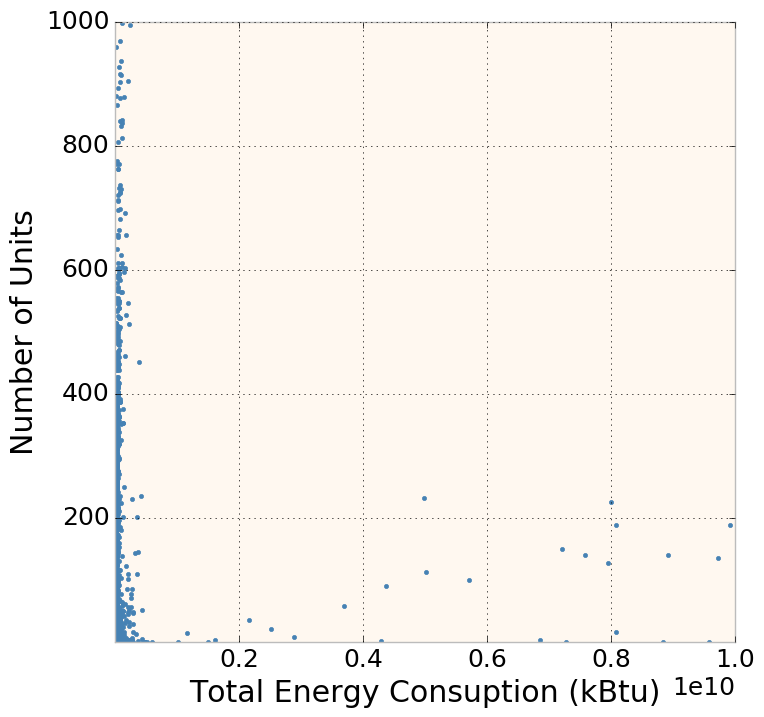

In [28]:
plt.figure(figsize = (8,8))
plt.plot(bblnrgdata['Energy'], bblnrgdata['UnitsTotal'], '.')

plt.xlim(1000,1e10)
plt.ylim(1,1000)

plt.xlabel('Total Energy Consuption (kBtu)')
plt.ylabel('Number of Units')


### Log plot
#### To make a log plot we have to get rid of zero values, as reccomended by DR. Bianco

In [29]:
bblnrgdata_cut = bblnrgdata[(bblnrgdata['UnitsTotal']>10) & (bblnrgdata['Energy']>1000)]

In [30]:
bblnrgdata_cut['UnitsTotal'].dropna(inplace = True)
bblnrgdata_cut['Energy'].dropna(inplace = True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/series.py:2571: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


In [31]:
bblnrgdata_cut.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),BldgArea,UnitsRes,UnitsTotal,Energy
2,1.013110e+09,125.4,330000,313200,0,56,41382000.0
16,1.008150e+09,117,364000,364000,0,24,42588000.0
18,1.005050e+09,82.1,235370,214110,0,24,19323877.0
19,1.021420e+09,137.69999999999999,64806,64816,54,62,8923786.2
20,1.021750e+09,103.2,62839,62847,75,85,6484984.8


(10, 1500)

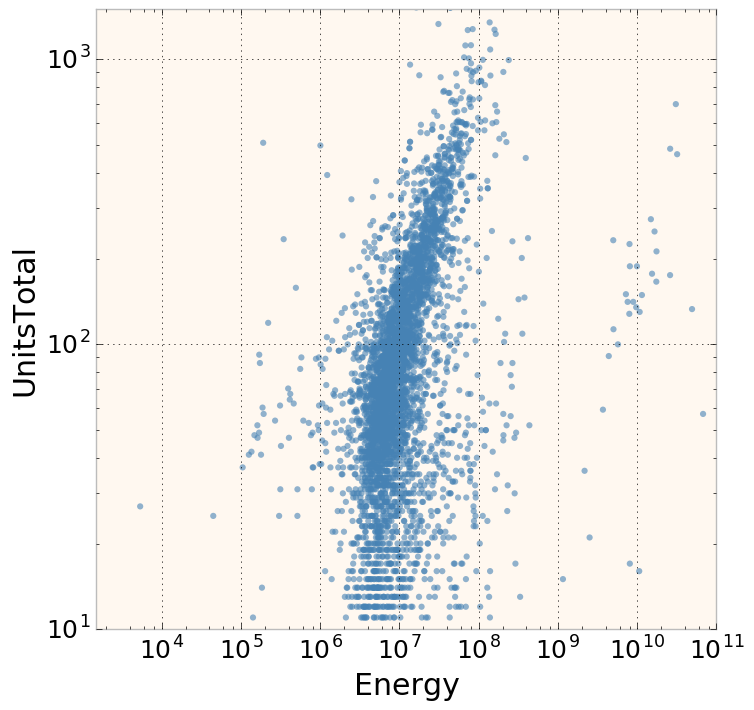

In [32]:
bblnrgdata_cut.plot.scatter('Energy', 'UnitsTotal', 
                            loglog=True, figsize = (8,8),
                            alpha = 0.6, edgecolors='none', 
                            color = "SteelBlue"
                       )
plt.xlim(1500,1e11)
plt.ylim(10,1500)

Energy x Total Units plot

(10, 1500)

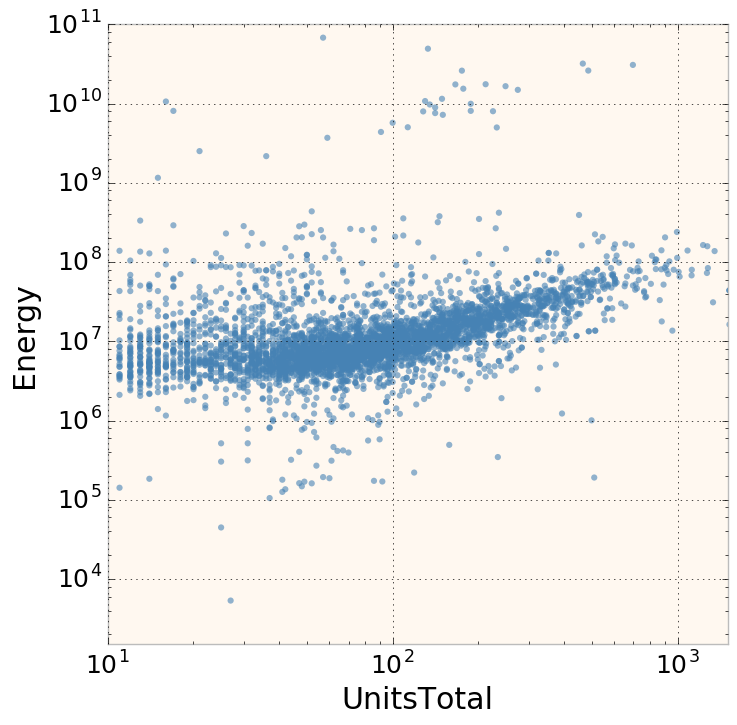

In [33]:
bblnrgdata_cut.plot.scatter('UnitsTotal', 'Energy',
                            loglog=True, figsize = (8,8),
                            alpha = 0.6, edgecolors='none', 
                            color = "SteelBlue"
                       )
plt.ylim(1500,1e11)
plt.xlim(10,1500)

Total Units x Energy plot

### Let's fit it into a linear model

In [34]:
x_1 = bblnrgdata_cut['UnitsTotal']
y_1 = bblnrgdata_cut['Energy']
X_1 = sm.add_constant(np.log10(x_1))
# UnEn --> x = UnitsTotal ; y = Energy
UnEn = sm.OLS(np.log10(y_1), X_1, missing='drop').fit() # ignores entires 
                                                     # where x or y is NaN
    
x_2 = bblnrgdata_cut['Energy']
y_2 = bblnrgdata_cut['UnitsTotal']
X_2 = sm.add_constant(np.log10(x_2))
# EnUn --> x = UnitsTotal ; y = Energy
EnUn = sm.OLS(np.log10(y_2), X_2, missing='drop').fit() # ignores entires 
                                                     # where x or y is NaN

In [35]:
UnEn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Energy   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     904.7
Date:                Thu, 27 Oct 2016   Prob (F-statistic):          1.99e-180
Time:                        16:12:42   Log-Likelihood:                -2561.7
No. Observations:                4266   AIC:                             5127.
Df Residuals:                    4264   BIC:                             5140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.0867      0.032    188.659      0.000         6.023     6.150
UnitsTotal     0.4994      0.017     30.079      0.000         0.467     0.532
==============================================================================
Omnibus:                     2245.418   Durbin-Watson:                   1.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45084.375
Skew:                           2.059   Prob(JB):                         0.00
Kurtosis:                      18.384   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
EnUn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             UnitsTotal   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     904.7
Date:                Thu, 27 Oct 2016   Prob (F-statistic):          1.99e-180
Time:                        16:12:42   Log-Likelihood:                -1806.3
No. Observations:                4266   AIC:                             3617.
Df Residuals:                    4264   BIC:                             3629.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.5658      0.082     -6.886      0.000        -0.727    -0.405
Energy         0.3505      0.012     30.079      0.000         0.328     0.373
==============================================================================
Omnibus:                      113.206   Durbin-Watson:                   1.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.763
Skew:                          -0.239   Prob(JB):                     1.69e-41
Kurtosis:                       3.910   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

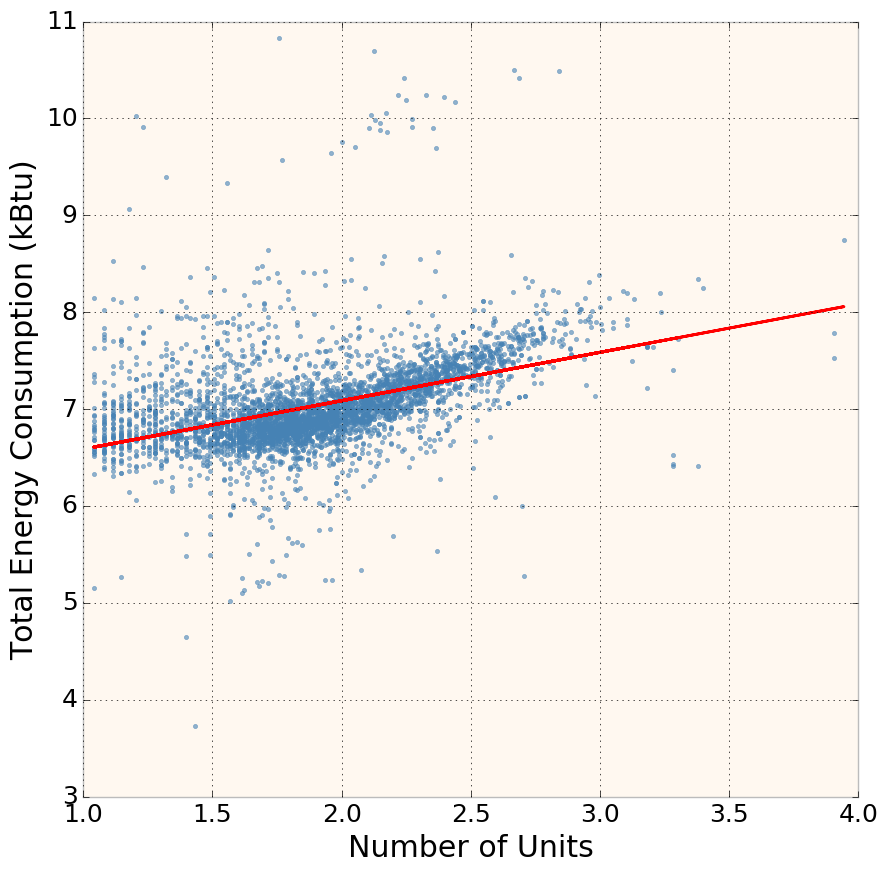

In [37]:
plt.figure(figsize=(10,10))

plt.plot(np.log10(bblnrgdata_cut['UnitsTotal']), 
         np.log10(bblnrgdata_cut['Energy']),
         '.', alpha = 0.6,
         color = "SteelBlue"
        )

plt.plot(np.log10(bblnrgdata_cut['UnitsTotal']), 
         UnEn.predict(sm.add_constant(np.log10(bblnrgdata_cut['UnitsTotal']))), 
         'r-'
        )

plt.xlabel('Number of Units')
plt.ylabel('Total Energy Consumption (kBtu)')

#### Caption: fit the Total Units x Total Energy in a line

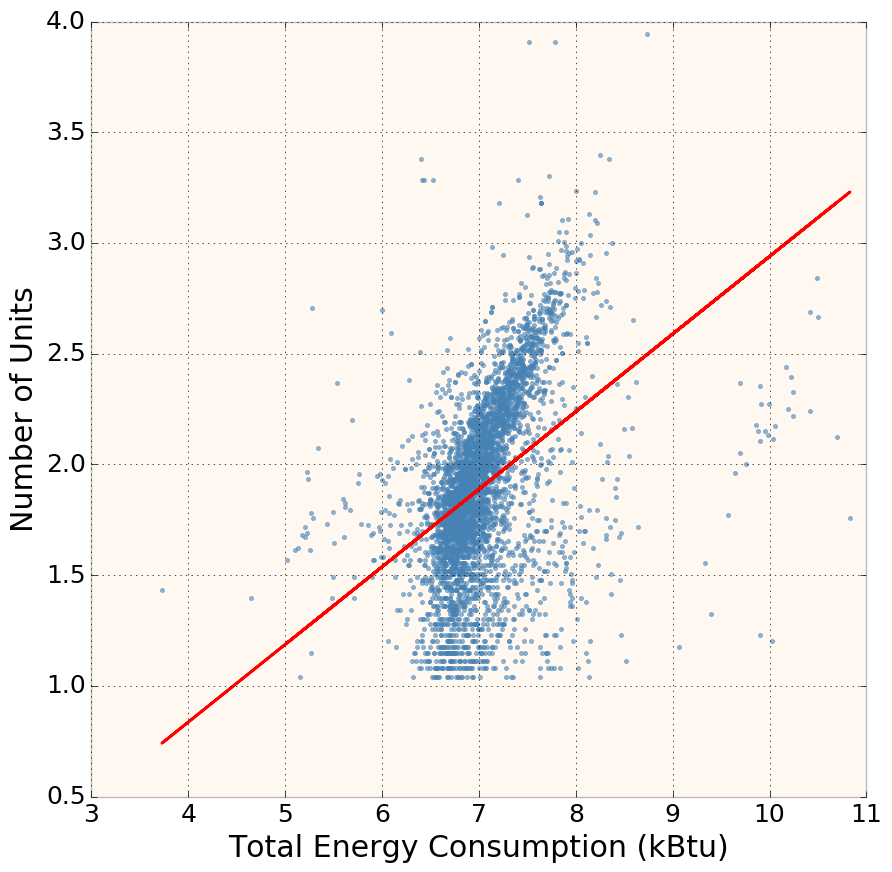

In [38]:
plt.figure(figsize=(10,10))

plt.plot(np.log10(bblnrgdata_cut['Energy']), 
         np.log10(bblnrgdata_cut['UnitsTotal']),
         '.', alpha = 0.6,
         color = "SteelBlue"
        )

plt.plot(np.log10(bblnrgdata_cut['Energy']), 
         EnUn.predict(sm.add_constant(np.log10(bblnrgdata_cut['Energy']))), 
         'r-'
        )

plt.ylabel('Number of Units')
plt.xlabel('Total Energy Consumption (kBtu)')

#### Caption: fit the Total Energy x Total Units in a line

### Evaluate which is better by calculating the chi square

In [39]:
# For x = UnitsTotal ; y = Energy
model = UnEn.predict(sm.add_constant(np.log10(bblnrgdata_cut['UnitsTotal']))) 
data = np.log10(bblnrgdata_cut['Energy'])
squares = (model-data)**2

chisq = squares/data

print(chisq.sum())

110.031790476


In [40]:
# For x = Energy ; y = UnitsTotal
model = UnEn.predict(sm.add_constant(np.log10(bblnrgdata_cut['Energy']))) 
data = np.log10(bblnrgdata_cut['UnitsTotal'])
squares = (model-data)**2

chisq = squares/data

print(chisq.sum())

142633.38367


#### We can observe that the model that predicts Energy based on UnitsTotal has much less accumulated error. It is better to calculate chi-square

### Fit a 2nd degree polynomial
#### Fitting a 2nd degree to UnitsTotal x Energy (best fit the data)

In [41]:
dataDF = pd.DataFrame()
dataDF['x'] = np.log10(bblnrgdata_cut['UnitsTotal'])
dataDF['x2'] = np.log10(bblnrgdata_cut['UnitsTotal']) ** 2
dataDF['y'] = np.log10(bblnrgdata_cut['Energy'])
dataDF.head()

,x,x2,y
2,1.748188,3.056161,7.616811
16,1.380211,1.904983,7.629287
18,1.380211,1.904983,7.286094
19,1.792392,3.212668,6.950549
20,1.929419,3.722657,6.811909


In [42]:
fres = smf.ols(formula = 'y ~ x2 + x', data=dataDF).fit()
fres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     567.2
Date:                Thu, 27 Oct 2016   Prob (F-statistic):          3.87e-219
Time:                        16:12:50   Log-Likelihood:                -2468.9
No. Observations:                4266   AIC:                             4944.
Df Residuals:                    4263   BIC:                             4963.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.4293      0.102     72.492      0.000         7.228     7.630
x2             0.3626      0.026     13.771      0.000         0.311     0.414
x             -0.9278      0.105     -8.844      0.000        -1.134    -0.722
==============================================================================
Omnibus:                     2280.521   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55223.028
Skew:                           2.042   Prob(JB):                         0.00
Kurtosis:                      20.146   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(4, 10)

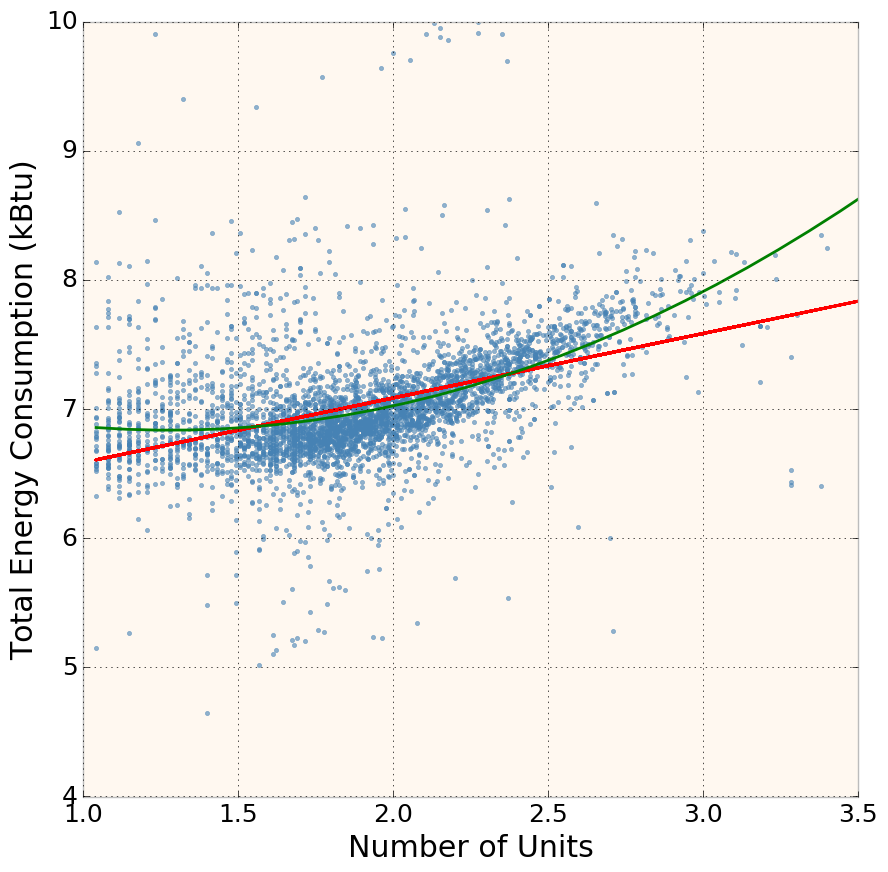

In [43]:
plt.figure(figsize=(10,10))

plt.plot(np.log10(bblnrgdata_cut['UnitsTotal']), 
         np.log10(bblnrgdata_cut['Energy']),
         '.', alpha = 0.6,
         color = "SteelBlue"
        )

plt.plot(np.log10(bblnrgdata_cut['UnitsTotal']), 
         UnEn.predict(sm.add_constant(np.log10(bblnrgdata_cut['UnitsTotal']))), 
         'r-'
        )

plt.xlabel('Number of Units')
plt.ylabel('Total Energy Consumption (kBtu)')

dfnew = pd.DataFrame()
dfnew['x'] = np.arange(np.log10(bblnrgdata_cut['UnitsTotal']).min(), 
                       np.log10(bblnrgdata_cut['UnitsTotal']).max(), 
                       0.1
                      )

dfnew['x2'] = dfnew['x'] * dfnew['x']

pl.plot(dfnew['x'], 
        fres.predict(dfnew), 'g-')

plt.xlim(1,3.5)
plt.ylim(4,10)

### Caption: This image shows the linear and 2nd polynomial model to this set of data

### Compare the Units vs Energy line fit and the Units vs Energy 2-nd degree polynomial fit with the Likelihood ratio test

In [44]:
linemodel = UnEn
curvemodel = fres
    
print ("LR : ", -2 * (-linemodel.llf - (-curvemodel.llf)))
print ("LR from statsmodels:", curvemodel.compare_lr_test(linemodel))


LR :  -185.662275951
LR from statsmodels: (185.66227595137116, 2.8133177246589259e-42, 1.0)


### The LR shows that there is no statistic relevance, so we can say that the curve model (2nd polynomial) fit the data better than the linear model

In [45]:
UnEn.llf

-2561.6967330313569

In [46]:
fres.llf

-2468.8655950556713

NameError: name 'Lsurface' is not defined

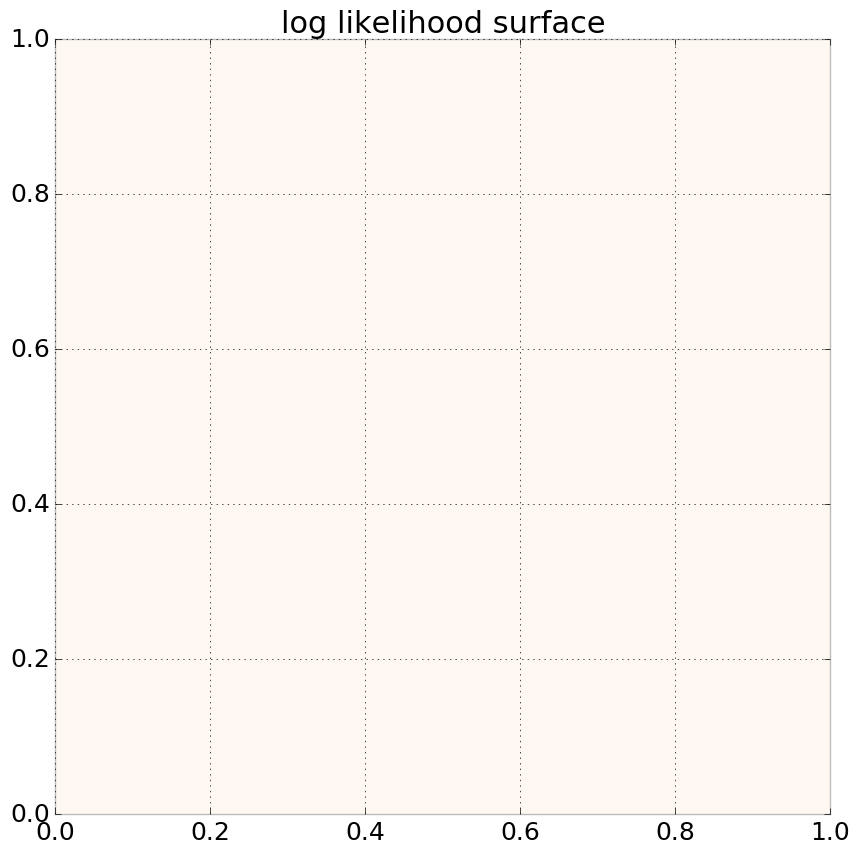

In [47]:
pl.figure(figsize=(10,10))
pl.title ("log likelihood surface", fontsize = 22)
pl.imshow(np.log(Lsurface), extent = [-50,50,100,-100], aspect=0.5)
pl.xlabel('slope', fontsize = 22)
pl.ylabel('intercept', fontsize = 22)
pl.colorbar()